# Simulation 1 - Plotting

Vivek Gopalakrishnan | July 8, 2019

Visualize the simulation results using high-quality `Seaborn` relplots.

In [1]:
import glob
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dfs = []

for file in glob.glob("results/m*.csv"):
    
    # Get the sample size
    sample_size = re.split("[/m.]", file)[2]
    
    # Read csv and add sample_size as column
    df = pd.read_csv(file)
    df["m"] = int(sample_size)
    dfs.append(df)
    
df = pd.concat(dfs)
df = df.sort_values(by=["m"])

## Visualize the 10 sample sizes

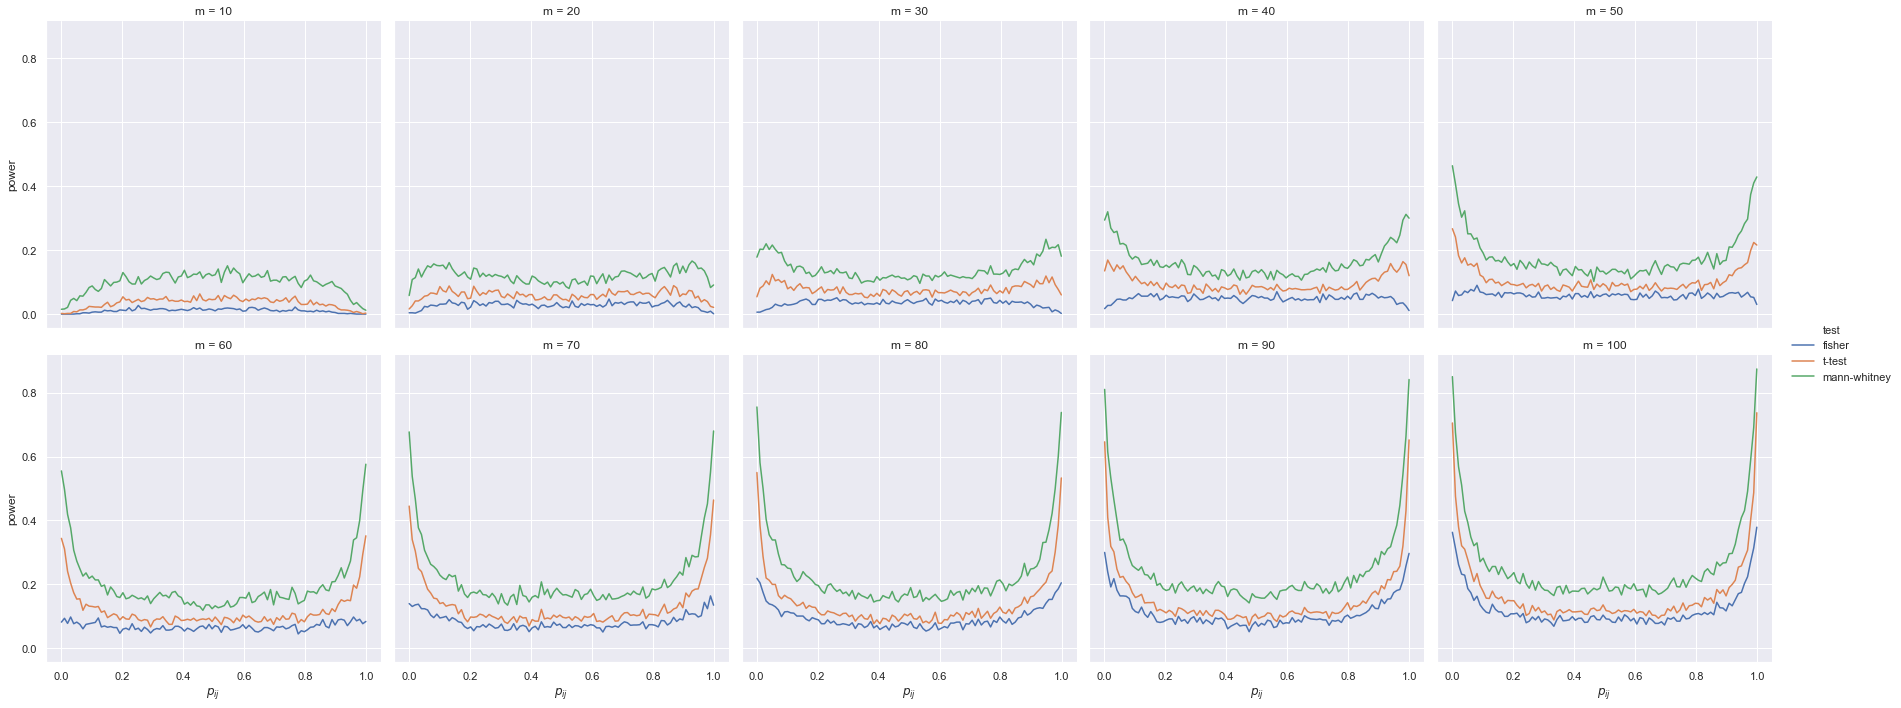

In [3]:
sns.set()

ax = sns.relplot(
    x=r"$p_{ij}$",
    y="power",
    hue="test",
    col="m",
    col_wrap=5,
    data=df,
    legend="full",
    kind="line",
)

plt.savefig("all_samples.png", dpi=300)
plt.show()

## Plot the endpoints

In [4]:
df_sub = df.query("m in [10, 100]")
df_sub.head()

,Unnamed: 0,$p_{ij}$,test,power,m
299,299,0.999000,fisher,0.000,10
95,95,0.958677,t-test,0.005,10
96,96,0.968758,t-test,0.008,10
97,97,0.978838,t-test,0.005,10
98,98,0.988919,t-test,0.001,10


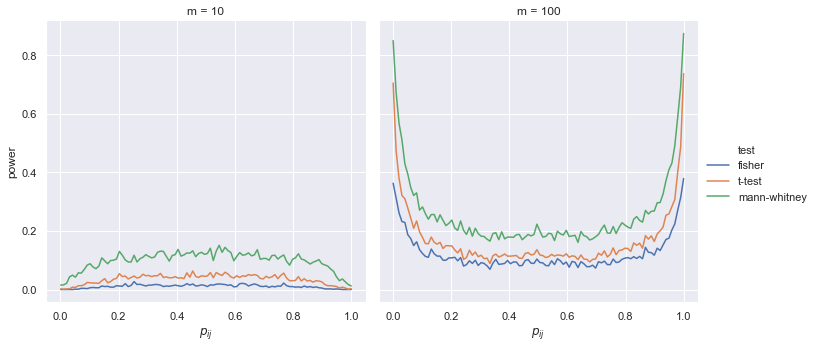

In [5]:
# Plot the power as a function of the connection strength
sns.set()

ax = sns.relplot(
    x=r"$p_{ij}$",
    y="power",
    hue="test",
    col="m",
    data=df_sub,
    legend="full",
    kind="line",
)

plt.savefig("experiment2.png", dpi=300)
plt.show()